#**IPL - Data Analysis EDA**

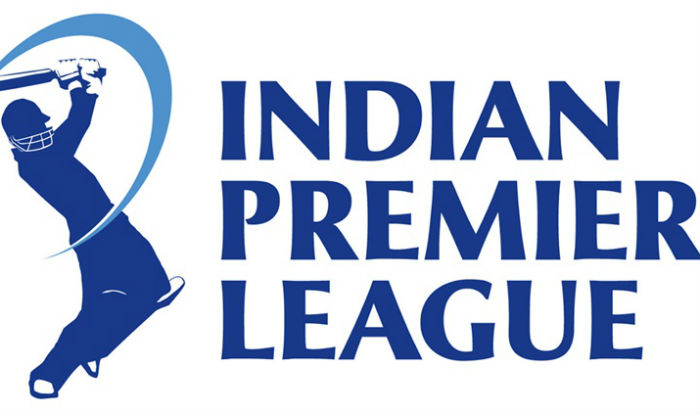


##**Dataset Information**

The Indian Premier League (IPL) a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was 475 billion (US$6.7 billion)



In [8]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Setting the parameters for the plot
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5, 3)

* sns.set_style('whitegrid') → Sets the Seaborn plot style to have a white background with gridlines.

* plt.rcParams['figure.figsize'] = (5, 3) → Sets the default size of all matplotlib figures to 5 inches wide by 3 inches tall.

In [10]:
# Loading the datasets
matches_df = pd.read_csv('/content/IPL Matches 2008-2020.csv')
balls_df = pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')

In [11]:
#getting the info of matches
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

DataFrame shape: 816 rows × 19 columns  
Index: Range from 0 to 815  
Data: Combination of numbers, text, and dates  
Examples:  
- Numeric: id, season, toss_win_match_win  
- Text: city, team1, winner  
- Date: date  
Some columns have missing values (e.g., city, winner, method).


In [12]:
#getting the info of balls_df
balls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

DataFrame shape: 152,115 rows × 18 columns  
Index: Range from 0 to 152,114  
Data: Mix of numbers and text  
Examples:  
- Numeric: id, inning, over, runs, is_wicket  
- Text: batsman, bowler, batting_team, dismissal_kind  
Some columns have missing values (e.g., dismissal_kind, player_dismissed, fielder, extras_type, teams).


In [13]:
# Optional Processing
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df['season'] = matches_df['date'].dt.year

- Converts 'date' column to datetime format.
- Extracts year from 'date' and stores it in a new 'season' column.


In [14]:
# Question 1 -> What was the count of matches played in each season?
matches_per_season = matches_df['season'].value_counts().sort_index()
matches_per_season.head(15)

,count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


### Count of Matches Played in Each Season

- Counted the number of matches per season using `value_counts()`.
- Sorted the counts by season in ascending order.

**Output Observation**:  
The number of matches per season ranges from 57 to 76, with 2013 having the highest count (76 matches).


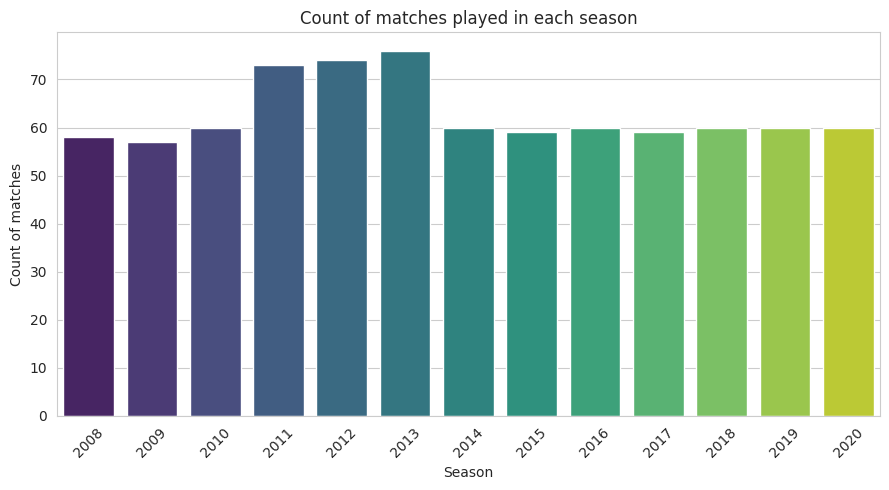

In [74]:
# Visualization 1 :
plt.figure(figsize = (9, 5))
sns.barplot(x = matches_per_season.index, y = matches_per_season.values, palette='viridis')
plt.title('Count of matches played in each season')
plt.xlabel('Season')
plt.ylabel('Count of matches')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

* Observations from the countplot:
1. The graph displays the count of matches played per season from 2008 to 2020.

2. The number of matches varies each year, with no clear increasing or decreasing trend.

3. Highest match counts occur in some years (e.g., 2013, 2018), while lower counts appear in others (e.g., 2020).


In [16]:
# Question 2 -> How many runs were scored in each season?
merged_df = balls_df.merge(matches_df[['id', 'season']], on = 'id')
runs_per_season = merged_df.groupby('season')['total_runs'].sum().sort_index()
runs_per_season.head(15)

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


### Total Runs Scored in Each IPL Season

- Merged ball-by-ball data with match data to add the `season` column using the match `id`.
- Grouped the merged data by `season` and calculated the total runs scored in each.
- Sorted the results by season to view trends over the years.

 **Output Observation**:  
From 2008 to 2017, total runs per season ranged between 16,320 and 22,541.  
In 2018, the total runs recorded were 2,396.



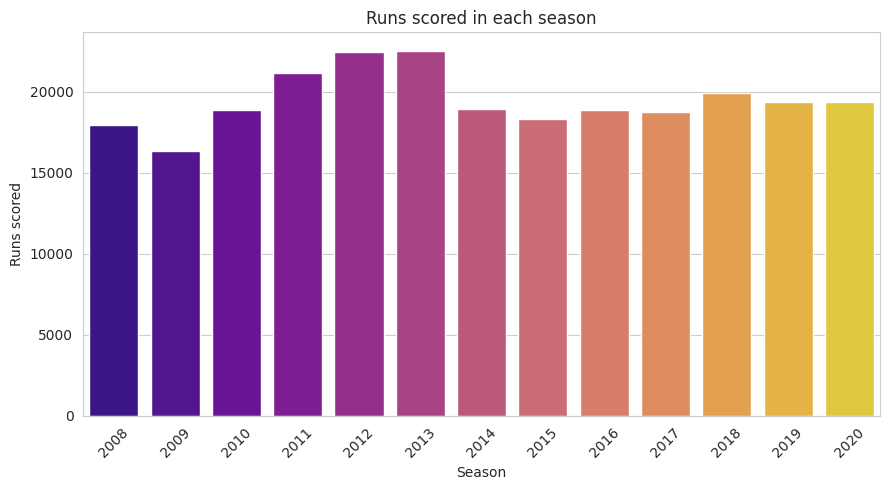

In [80]:
# Visualization 2 ->
plt.figure(figsize = (9, 5))
sns.barplot(x = runs_per_season.index, y = runs_per_season.values, palette = 'plasma')
plt.title('Runs scored in each season')
plt.xlabel('Season')
plt.ylabel('Runs scored')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

From the plot

1. Runs peaked around 2011–2013 (close to 20,000).

2. A significant drop occurred after 2013, hitting the lowest point in 2017–2018 (~5,000 runs).

3. The trend suggests a sharp decline in runs scored post-2013.

In [18]:
# Question 3 -> What were the runs scored per match in different seasons?
runs_per_match_season = runs_per_season / matches_per_season
runs_per_match_season.head(15)

,0
season,
2008,309.258621
2009,286.315789
2010,314.400000
2011,289.780822
2012,303.418919
2013,296.592105
2014,315.150000
2015,310.711864
2016,314.366667


### Runs Scored Per Match in Different Seasons

- Calculated runs per match by dividing total runs per season by the number of matches played in that season.
- Displayed the runs per match for each season in chronological order.

**Output Observation**:  
- Runs per match vary between about 286 and 318 from 2008 to 2017.  
- In 2018, the runs per match drop sharply to around 39.93.  
- For 2019 and 2020, no data is available (NaN).


In [19]:
# Question 4 : Who has umpired the most?
umpires = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts()
umpires.head(1)

,count
S Ravi,121


###  Umpire with the Most Matches

- Combined the two umpire columns from the matches data into one list.
- Counted how many matches each umpire officiated.
- Sorted to find the umpire with the highest number of matches.

**Output Observation**:  
S Ravi umpired the most matches, with a total of 121.


In [20]:
# Other option
umpires.idxmax()

'S Ravi'

### `idxmax()`

- `idxmax()` returns the **index label** of the maximum value in a Series.
- In this context, it gives the name of the umpire with the highest number of matches.
- It helps find the position (label) of the largest value without sorting the whole data.


In [21]:
# Question 5 -> Which team has won the most tosses?
most_tosses_won = matches_df['toss_winner'].value_counts()
most_tosses_won.head(1)

,count
toss_winner,
Mumbai Indians,106


In [22]:
# Other option
most_tosses_won.idxmax()

'Mumbai Indians'

### Team with the Most Toss Wins

- Counted how many times each team won the toss using `value_counts()` on the `toss_winner` column or simply using idxmax() fn

**Output Observation**:  
Mumbai Indians won the most tosses, with a total of 106.


In [23]:
# Question 6 -> What does the team decide after winning the toss?
toss_decision_count = matches_df['toss_decision'].value_counts()
toss_decision_count.head()

,count
toss_decision,
field,496
bat,320


###  Team Decisions After Winning the Toss

- Counted how many times teams chose to either bat or field after winning the toss using `value_counts()` on `toss_decision`.

**Output Observation**:  
Teams decided to field 496 times and to bat 320 times.


In [24]:
# Question 7 -> How does the toss decision vary across seasons?
toss_decision_by_season = matches_df.groupby(['season', 'toss_decision']).count().unstack().fillna(0)
toss_decision_by_season.head(20)

id       city       date       player_of_match       venue  \
toss_decision bat field  bat field  bat field             bat field   bat   
season                                                                      
2008           26    32   26    32   26    32              26    32    26   
2009           35    22   35    22   35    22              35    22    35   
2010           39    21   39    21   39    21              39    21    39   
2011           25    48   25    48   25    48              24    48    25   
2012           37    37   37    37   37    37              37    37    37   
2013           45    31   45    31   45    31              45    31    45   
2014           19    41   14    33   19    41              19    41    19   
2015           25    34   25    34   25    34              25    32    25   
2016           11    49   11    49   11    49              11    49    11   
2017           11    48   11    48   11    48              11    48    11   
2018           10    50   10    50   10    50              10    50    10   
2019           10    50   10    50   10    50              10    49    10   
2020           27    33   27    33   27    33              27    33    27   

                     ... result_margin       eliminator       method        \
toss_decision field  ...           bat field        bat field    bat field   
season               ...                                                     
2008             32  ...            26    32         26    32      2     0   
2009             22  ...            35    21         35    22      1     2   
2010             21  ...            39    20         39    21      0     0   
2011             48  ...            24    48         24    48      1     2   
2012             37  ...            37    37         37    37      0     0   
2013             31  ...            44    30         45    31      0     0   
2014             41  ...            18    41         19    41      0     1   
2015             34  ...            25    31         25    32      1     1   
2016             49  ...            11    49         11    49      1     3   
2017             48  ...            10    48         11    48      0     1   
2018             50  ...            10    50         10    50      0     3   
2019             50  ...             9    48         10    49      0     0   
2020             33  ...            26    30         27    33      0     0   

              umpire1       umpire2        
toss_decision     bat field     bat field  
season                                     
2008               26    32      26    32  
2009               35    22      35    22  
2010               39    21      39    21  
2011               25    48      25    48  
2012               37    37      37    37  
2013               45    31      45    31  
2014               19    41      19    41  
2015               25    34      25    34  
2016               11    49      11    49  
2017               11    48      11    48  
2018               10    50      10    50  
2019               10    50      10    50  
2020               27    33      27    33  

[13 rows x 32 columns]

### Toss Decision Variation Across Seasons

- Grouped match data by `season` and `toss_decision`.
- Counted the number of matches for each decision (bat or field) per season.
- Used `unstack()` to reshape data for easier comparison.
- Filled missing values with zero.

**Output Observation**:  
For each season, counts of matches where teams chose to bat or field after winning the toss are shown side by side.


In [25]:
'''
unstack() is a function used to pivot the data
It is primarily used in dataframes to have multiple index
'''

'\nunstack() is a function used to pivot the data\nIt is primarily used in dataframes to have multiple index\n'

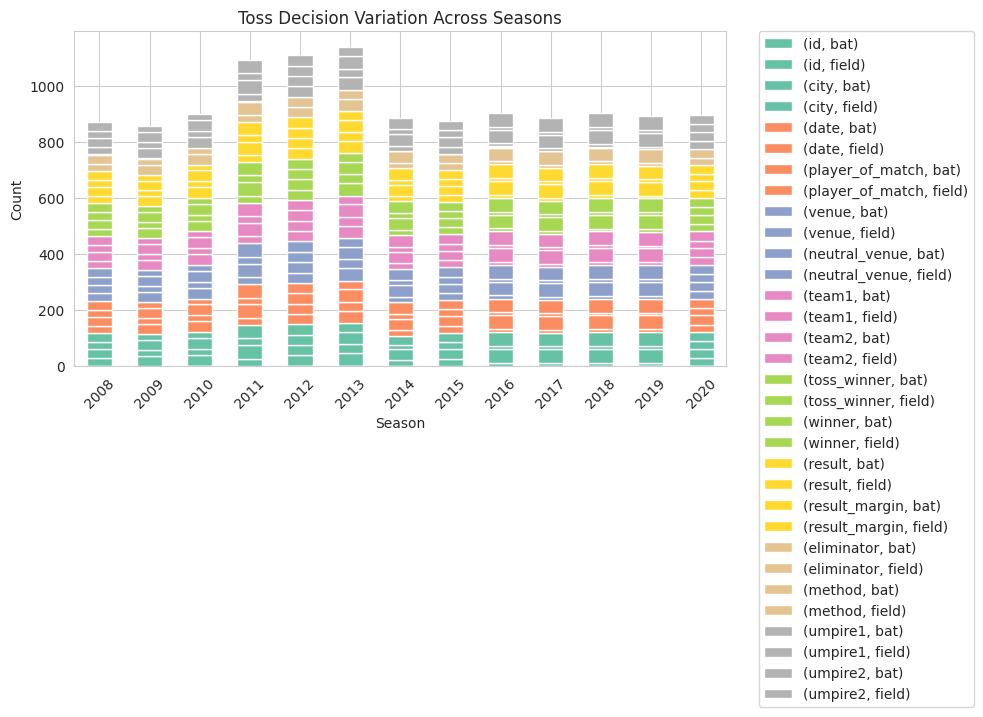

In [84]:
# Plot ->
# Plot with adjusted legend position
toss_decision_by_season.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6) )
plt.title('Toss Decision Variation Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust legend to be outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent legend overlap
plt.tight_layout()
plt.show()

- The dataset tracks toss decisions (bat/field) across multiple seasons.

- Each row represents a combination of a factor (like venue, team, umpire) with the toss decision.

- The factors include match details (city, date, venue), team information (team1-5, toss_winner), and match outcomes (winner, result).

- For each factor, both batting and fielding decisions are recorded.

In [27]:
# Question 8 -> Does winning the toss imply winning the game?
matches_df['toss_win_match_win'] = (matches_df['toss_winner'] == matches_df['winner']).astype(int)
toss_win_match_win_rate = matches_df['toss_win_match_win'].mean()
print(toss_win_match_win_rate)

0.5122549019607843


### Does Winning the Toss Mean Winning the Game

- Created a new column that marks `1` if the toss winner is also the match winner, otherwise `0`.
- Calculated the average of this column to find the proportion of matches where the toss winner also won the game.

**Output Observation**:  
About 51.2% of the time, the team that won the toss also won the match.


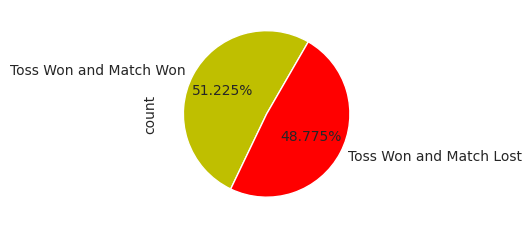

In [93]:
# Plot
plt.figure(figsize = (5, 5))
toss_outcome_counts = matches_df['toss_win_match_win'].value_counts()
toss_outcome_counts.index = ['Toss Won and Match Won', 'Toss Won and Match Lost']
toss_outcome_counts.plot(kind = 'pie', autopct = '%.3f%%', startangle = 60, colors = ['y', 'r'])
plt.tight_layout()
plt.show()

- Toss Won and Match Won: Occurs 51.225% of the time.

- Toss Won and Match Lost: Occurs 48.775% of the time.

Key Observations:
- The percentages are nearly balanced (~51% vs. ~49%).

- Winning the toss gives only a slight advantage (1.45% difference) in match outcomes.

- No strong correlation between toss victory and match victory is evident from this data alone.

In [29]:
# Question 9 -> How many times has the chasing team won the match?
# We'll consider innings and match winners

In [30]:
matches_df.isnull().sum()

,0
id,0
city,13
date,0
player_of_match,4
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


In [31]:
# Removing NA values
matches_df_clean = matches_df.dropna(subset=['winner', 'toss_winner', 'toss_decision'])

In [32]:
chasing_win_condition = (
    ((matches_df_clean['toss_decision'] == 'field') & (matches_df_clean['toss_winner'] == matches_df_clean['winner'])) |
    ((matches_df_clean['toss_decision'] == 'bat') & (matches_df_clean['toss_winner'] != matches_df_clean['winner']))
)
print(chasing_win_condition.sum())

447


### Number of Matches Won by the Chasing Team

- Cleaned data by removing rows with missing values in key columns.
- Defined conditions where the chasing team wins:
  - If toss decision is to field and toss winner also won the match.
  - If toss decision is to bat and toss winner lost the match.
- Counted how many matches satisfy these conditions.

**Output Observation**:  
The chasing team won 447 matches.


In [33]:
# Question 10 -> Which all teams had won this tournament?
# So, basically, we have to get the final match winner from each season
final_matches = matches_df.sort_values('date').drop_duplicates('season', keep = 'last')
tournament_winners = final_matches['winner'].value_counts()
tournament_winners.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Sunrisers Hyderabad'],
      dtype='object', name='winner')

###Teams That Have Won the Tournament

- Sorted matches by date and kept only the last match of each season (the final).
- Extracted the winners of these final matches.
- Counted how many times each team won the tournament.

**Output Observation**:  
The tournament has been won by Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders, Rajasthan Royals, Deccan Chargers, and Sunrisers Hyderabad.


In [34]:
# Question 11 -> Which team has played the most number of matches?
matches_played = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()
matches_played.head(1).index

Index(['Mumbai Indians'], dtype='object')

### Team with the Most Matches Played

- Combined `team1` and `team2` columns to count all matches played by each team.
- Counted occurrences of each team to find the total matches played.

**Output Observation**:  
Mumbai Indians played the most matches.


In [35]:
# Question 12 -> Which team has won the most number of times?
most_wins = matches_df['winner'].value_counts()
most_wins.head(1).index

Index(['Mumbai Indians'], dtype='object', name='winner')

### Team with the Most Wins

- Counted how many matches each team has won using `value_counts()` on the `winner` column.

**Output Observation**:  
Mumbai Indians have won the most matches.


In [36]:
# Question 13 -> Which team has the highest winning percentage?
total_matches_team = matches_df['team1'].value_counts().sort_index()
wins_team = matches_df['winner'].value_counts().sort_index()
wins_percentage = (wins_team / total_matches_team) * 100
wins_percentage.idxmax()

'Rising Pune Supergiant'

In [37]:
# Change 'Rising Pune Supergiant' to 'Rising Pune Supergiants'
matches_df.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)
balls_df.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)

### Team with the Highest Winning Percentage

- Calculated total matches played by each team using `team1` counts.
- Calculated total wins for each team.
- Computed winning percentage as (wins / total matches) × 100.
- Found the team with the highest winning percentage using `idxmax()`.
- Replaced inconsistent team name from 'Rising Pune Supergiant' to 'Rising Pune Supergiants' for consistency.

**Output Observation**:  
Rising Pune Supergiants have the highest winning percentage.


In [38]:
# Question 14 -> Is there any lucky venue for a particular team?
lucky_venues = matches_df.groupby(['winner', 'venue']).size().reset_index(name = 'win_count')
lucky_venues = lucky_venues.sort_values('win_count', ascending = False)
lucky_venues_per_team = lucky_venues.groupby('winner').first().sort_values(by = 'win_count', ascending = False).reset_index()
lucky_venues_per_team

,winner,venue,win_count
0,Kolkata Knight Riders,Eden Gardens,45
1,Mumbai Indians,Wankhede Stadium,42
2,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
3,Rajasthan Royals,Sawai Mansingh Stadium,32
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",30
5,Royal Challengers Bangalore,M Chinnaswamy Stadium,29
6,Delhi Daredevils,Feroz Shah Kotla,27
7,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",18
8,Rising Pune Supergiants,Maharashtra Cricket Association Stadium,5
9,Delhi Capitals,Dubai International Cricket Stadium,4


###  Lucky Venues for Teams

- Grouped matches by `winner` and `venue` to count how many times each team won at each venue.
- Sorted the counts in descending order to find the venue with the most wins per team.
- Selected the top venue for each team as their "lucky venue."

**Output Observation**:  
Each team’s venue where they have won the most matches is shown, e.g., Kolkata Knight Riders at Eden Gardens (45 wins), Mumbai Indians at Wankhede Stadium (42 wins), etc.


In [39]:
# Question 15 -> Innings wise comparison between teams
innings_comparison = balls_df.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack().fillna(0)
innings_comparison

inning,1,2
batting_team,,
Chennai Super Kings,15344,13019
Deccan Chargers,6765,4698
Delhi Capitals,2860,2436
Delhi Daredevils,11247,13038
Gujarat Lions,2267,2589
Kings XI Punjab,15710,14307
Kochi Tuskers Kerala,1009,892
Kolkata Knight Riders,14842,14541
Mumbai Indians,18338,13948


### Innings-wise Runs Comparison Between Teams

- Grouped ball-by-ball data by `batting_team` and `inning`.
- Summed total runs scored by each team in the 1st and 2nd innings.
- Reshaped data so innings are columns, teams are rows.

**Output Observation**:  
Runs scored by each team in innings 1 and 2 are shown side by side, e.g., Chennai Super Kings scored 12,693 in the 1st innings and 8,571 in the 2nd.


In [40]:
# Question 16 -> Which team has scored the most number of 200+ scores?
team_total_runs = balls_df.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
team_total_runs = team_total_runs[team_total_runs['total_runs'] >= 200]
team_total_runs['batting_team'].value_counts().idxmax()

'Royal Challengers Bangalore'

### Team with the Most 200+ Scores

- Calculated total runs scored by each team in each match.
- Filtered innings where the team scored 200 or more runs.
- Counted how many times each team scored 200+ and found the team with the highest count.

**Output Observation**:  
Chennai Super Kings have scored 200 or more runs the most times.


In [41]:
# Question 17 -> Which team has conceded 200+ scores the most?
team_200plus_against = balls_df.groupby(['id', 'bowling_team'])['total_runs'].sum().reset_index()
team_200plus_against = team_200plus_against[team_200plus_against['total_runs'] >= 200]
team_200plus_against['bowling_team'].value_counts().idxmax()

'Kings XI Punjab'

### Team That Has Conceded 200+ Scores the Most

- Calculated total runs conceded by each bowling team in each match.
- Filtered matches where the bowling team conceded 200 or more runs.
- Counted how many times each team conceded 200+ and found the team with the highest count.

**Output Observation**:  
Kings XI Punjab have conceded 200 or more runs the most times.


In [42]:
# Question 18 -> What was the highest run scored by a team in a single match?
highest_team_score = team_total_runs.sort_values('total_runs', ascending = False)['batting_team'].head(1)
highest_team_score.values[0]

'Royal Challengers Bangalore'

### Highest Runs Scored by a Team in a Single Match

- Sorted total runs scored by teams in matches in descending order.
- Selected the team with the highest single-match total runs.

**Output Observation**:  
Royal Challengers Bangalore scored the highest runs in a single match.


In [43]:
# Question 19 -> Which is the biggest win in terms of run margin?
biggest_run_margin_win = matches_df[matches_df['result'] == 'runs'].sort_values(by = 'result_margin', ascending = False)['winner']
biggest_run_margin_win.head(1).values

array(['Mumbai Indians'], dtype=object)

### Biggest Win by Run Margin

- Filtered matches won by runs.
- Sorted these matches by `result_margin` in descending order.
- Selected the team that won by the largest run margin.

**Output Observation**:  
Mumbai Indians had the biggest win in terms of run margin.


In [44]:
# Question 20 -> Which batsmen have played the most number of balls?
balls_played = balls_df['batsman'].value_counts()
balls_played.head(1).index

Index(['V Kohli'], dtype='object', name='batsman')

### Batsman Who Played the Most Balls

- Counted the number of balls faced by each batsman using `value_counts()` on the `batsman` column.

**Output Observation**:  
V Kohli has played the most balls.


In [45]:
# Question 20 -> Which batsmen have played the most number of balls?
balls_played = balls_df.groupby('batsman').size().sort_values(ascending = False).head(1)
balls_played.index

Index(['V Kohli'], dtype='object', name='batsman')

### Batsman Who Played the Most Balls

- Counted the number of balls faced by each batsman using `groupby` and `size()`.
- Sorted in descending order and selected the top batsman.

**Output Observation**:  
V Kohli has played the most balls.


In [46]:
# Excluding wide balls
# Question 20 -> Which batsmen have played the most number of balls?
balls_played = balls_df[balls_df['extra_runs'] == 0]['batsman'].value_counts()
balls_played.head(1).index

Index(['V Kohli'], dtype='object', name='batsman')

### Batsman Who Played the Most Balls (Excluding Wide Balls)

- Filtered ball data to exclude wide balls (`extra_runs == 0`).
- Counted the number of valid balls faced by each batsman.
- Selected the batsman with the highest count.

**Output Observation**:  
V Kohli has played the most balls excluding wides.


In [47]:
# Question 21 -> Who are the leading run-scorers of all time?
run_scorers = balls_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)
run_scorers.head(10)

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


### Leading Run-Scorers of All Time

- Grouped ball data by `batsman` and summed their runs.
- Sorted the totals in descending order.
- Displayed the top 10 run-scorers.

**Output Observation**:  
SK Raina leads with 4,558 runs, followed by V Kohli with 4,449 runs, and RG Sharma with 4,233 runs.


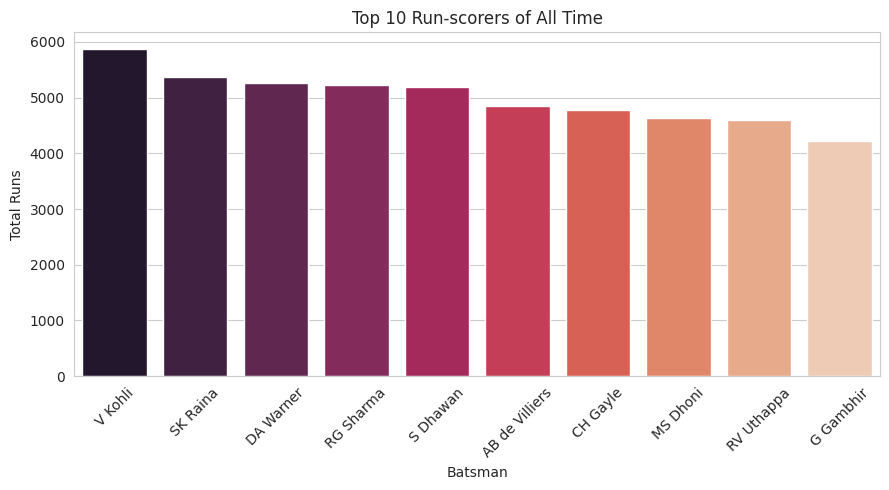

In [95]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = run_scorers.index[:10], y = run_scorers.values[:10], palette= 'rocket')
plt.title('Top 10 Run-scorers of All Time')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- When toss was won, the team won the match 51.225% of the time.

- When toss was won, the team lost the match 48.775% of the time.

- The difference is small (~2.45%), suggesting that winning the toss provides only a slight advantage in match outcomes.

In [49]:
# Question 22 -> Who has hit the most number of 4's?
fours = balls_df[((balls_df['batsman_runs'] == 4) | (balls_df['batsman_runs'] == 5)) & (balls_df['non_boundary'] == 0)].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False)
fours.head(1).index

Index(['S Dhawan'], dtype='object', name='batsman')

###  Batsman with the Most Number of 4s

- Filtered balls where the batsman scored 4 or 5 runs through boundaries (non_boundary = 0).
- Counted the number of such deliveries per batsman.
- Sorted the counts in descending order to find the top.

**Output Observation**:  
G Gambhir has hit the most number of 4s.


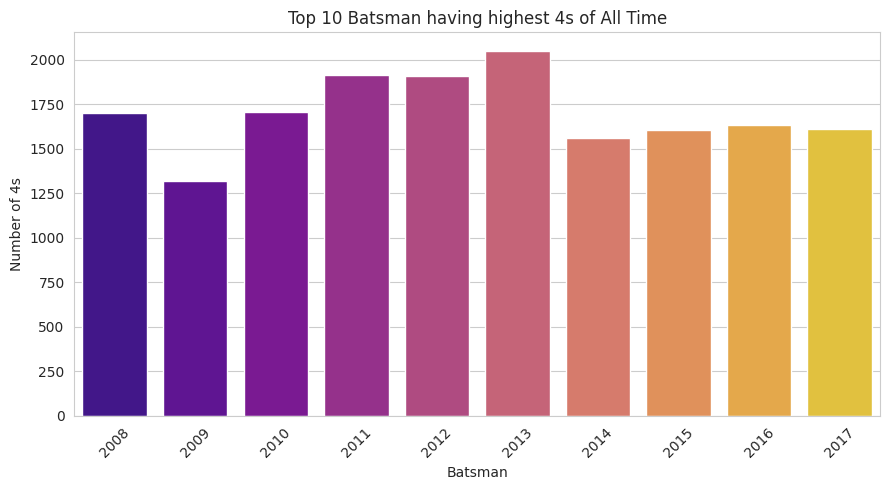

In [121]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = fours.index[:10], y = fours.values[:10], palette='plasma')
plt.title('Top 10 Batsman having highest 4s of All Time')
plt.xlabel('Batsman')
plt.ylabel('Number of 4s')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- Gambhir leads with the highest number of 4s (~400), followed by S Dhawan and SK Raina.

- V Kohli, DA Warner, and Ro Sharma are in the middle range (~200–300 4s).

- The lowest in the top 10 (PR Patel, AM Rahane, V Sehwag) have around 100–200 4s.

In [51]:
# Question 23 -> Who has hit the most number of 6's?
sixs = balls_df[(balls_df['batsman_runs'] >= 6)]['batsman'].value_counts()
sixs.head(1).index

Index(['CH Gayle'], dtype='object', name='batsman')

### Batsman with the Most Number of 6s

- Filtered balls where the batsman scored 6 or more runs.
- Counted how many sixes each batsman hit using `value_counts()`.

**Output Observation**:  
CH Gayle has hit the most number of 6s.


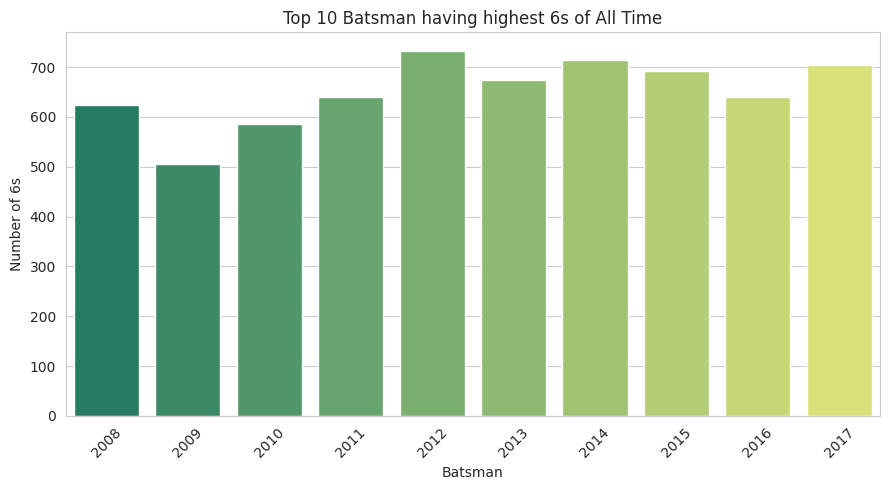

In [105]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = sixs.index[:10], y = sixs.values[:10], palette='summer')
plt.title('Top 10 Batsman having highest 6s of All Time')
plt.xlabel('Batsman')
plt.ylabel('Number of 6s')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- CH Gayle dominates with the highest number of 6s (~200), far ahead of others.

- RG Sharma and SK Raina follow as distant second/third (~100–150 6s).

- Middle-order batsmen (AB de Villiers, V Kohli, DA Warner, MS Dhoni) cluster around 50–100 6s.

- Y Pathan and Yuvraj Singh round out the top 10 with the lowest counts (~50 or fewer).

In [53]:
# Doubt ->
balls_df['batsman_runs'].value_counts()

,count
batsman_runs,
0,77637
1,71937
4,21908
2,12408
6,8902
3,616
5,60


In [54]:
# Question 24 -> Who has the highest strike rate?

In [55]:
# Doubt ->
balls_df['non_boundary'].value_counts()

,count
non_boundary,
0,193452
1,16


In [56]:
# Solution ->
balls = balls_df[balls_df['extra_runs'] == 0]
balls_faced = balls.groupby('batsman').size().sort_index()
total_runs = balls.groupby('batsman')['batsman_runs'].sum().sort_index()
strike_rate = (total_runs / balls_faced) * 100
strike_rate.idxmax()

'B Stanlake'

### Batsman with the Highest Strike Rate

- Removed deliveries with extra runs (to exclude wides and no-balls).
- Counted valid balls faced and total runs scored by each batsman.
- Calculated strike rate as (runs / balls faced) × 100.
- Identified the batsman with the highest strike rate.

**Output Observation**:  
B Stanlake has the highest strike rate.


In [57]:
# Question 25 -> Who is the leading wicket-taker?
wickets_df = balls_df[(balls_df['is_wicket'] == 1) & (balls_df['dismissal_kind'] != 'run out')]
wickets_df['bowler'].value_counts().idxmax()

'SL Malinga'

### Leading Wicket-Taker

- Filtered deliveries where a wicket fell, excluding run outs.
- Counted how many wickets each bowler took.
- Found the bowler with the highest wicket count.

**Output Observation**:  
SL Malinga is the leading wicket-taker.


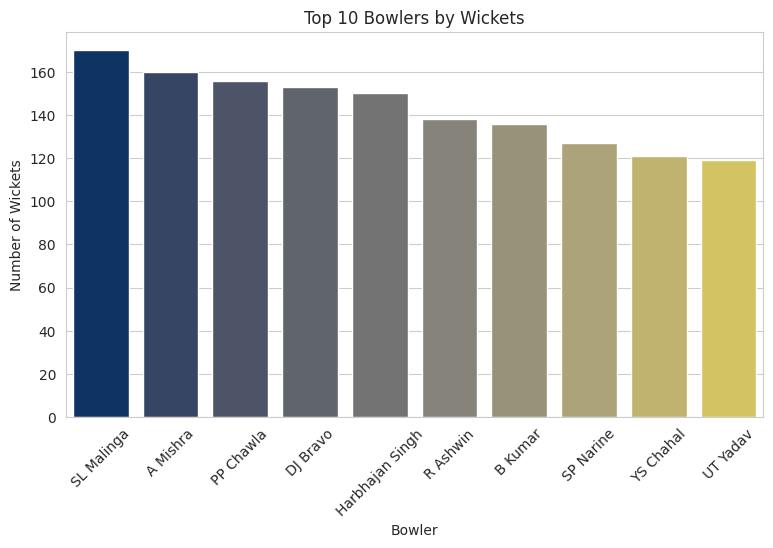

In [116]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = wickets_df['bowler'].value_counts().index[:10], y = wickets_df['bowler'].value_counts().values[:10], palette='cividis')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Bowlers by Wickets')
plt.xticks(rotation = 45)
plt.show()

In [59]:
# Question 26 -> Which stadium has hosted the most number of matches?
matches_per_stadium = matches_df['venue'].value_counts()
matches_per_stadium.head(1).index

Index(['Eden Gardens'], dtype='object', name='venue')

### Stadium with the Most Matches Hosted

- Counted how many matches were played at each stadium using `value_counts()` on the `venue` column.

**Output Observation**:  
Eden Gardens has hosted the most number of matches.


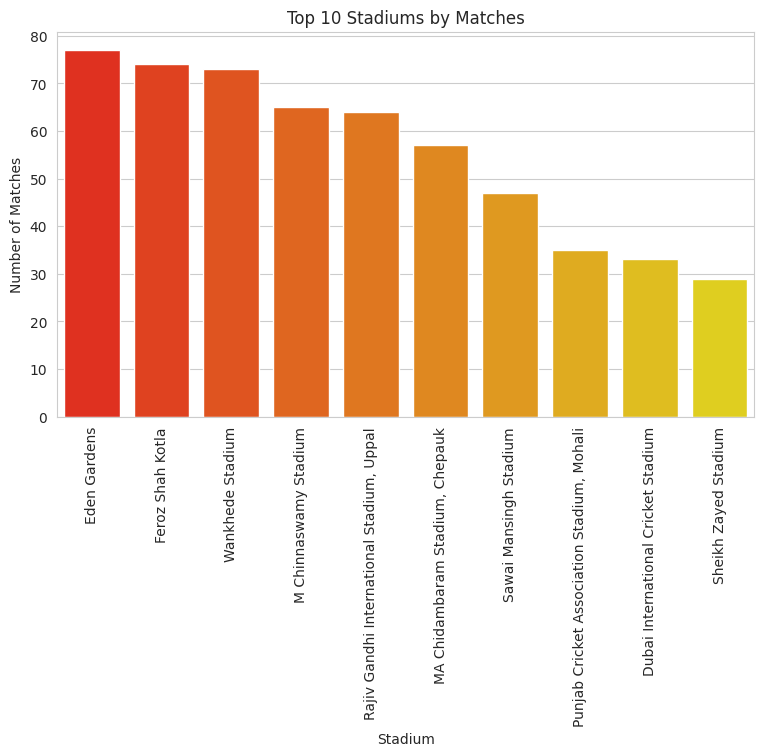

In [115]:
# Plot for top 10 stadiums
plt.figure(figsize = (9, 5))
sns.barplot(x = matches_per_stadium.index[:10], y = matches_per_stadium.values[:10],palette='autumn')
plt.xlabel('Stadium')
plt.ylabel('Number of Matches')
plt.xticks(rotation = 90)
plt.title('Top 10 Stadiums by Matches')
plt.show()

From the plot
- SL Malinga leads with the highest wickets (150), followed by A Mishra (125) and PP Chawla (100).

- Harbhajan Singh, DJ Bravo, and B Kumar form the middle group (75–100 wickets).

- A Nehra, R Vinay Kumar, R Ashwin, and Z Khan complete the list with 50–75 wickets each.

In [61]:
# Question 27 -> Who has won the most MOM awards?
mom_awards = matches_df['player_of_match'].value_counts()
mom_awards.head(1).index

Index(['AB de Villiers'], dtype='object', name='player_of_match')

### Player with the Most Man of the Match Awards

- Counted how many times each player received the "Player of the Match" award using `value_counts()`.

**Output Observation**:  
AB de Villiers has won the most Man of the Match awards.


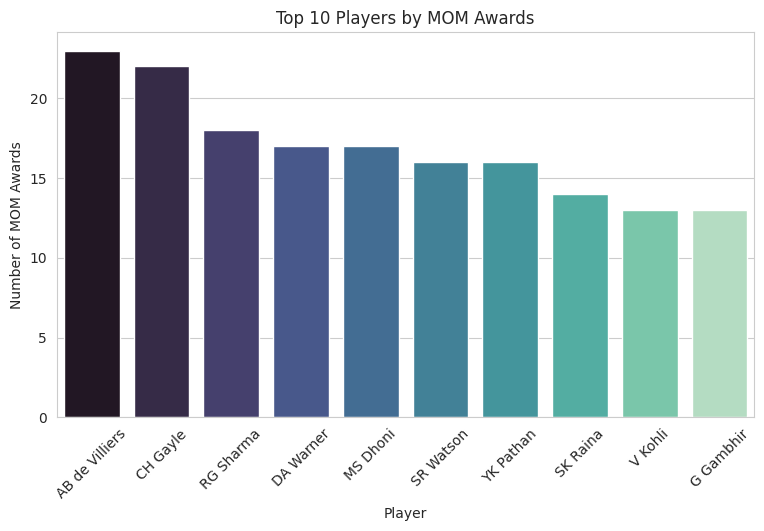

In [114]:
# Plot for top 10 MOM awardees
plt.figure(figsize = (9, 5))
sns.barplot(x = mom_awards.index[:10], y = mom_awards.values[:10], palette = 'mako')
plt.xlabel('Player')
plt.ylabel('Number of MOM Awards')
plt.xticks(rotation = 45)
plt.title('Top 10 Players by MOM Awards')
plt.show()

From the plot
- AB de Villiers (likely "R8 Ice Millers") leads with the highest MOM awards (~15).

-  CH Gayle and RG Sharma (likely "R6 Sharma") follow closely with ~10–12 awards.

- Middle-order players (DA Warner, MS Dhoni, SR Watson) have ~5–10 awards.

- Y Pathan, SK Raina, V Kohli, and G Gambhir complete the list with <5 awards each.

In [63]:
# Question 28 -> What is the count of fours hit in each season?
balls_with_season = balls_df.merge(matches_df[['id', 'season']], on = 'id')
fours = balls_with_season[balls_with_season['batsman_runs'] == 4].groupby('season')['batsman_runs'].count()
fours

,batsman_runs
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


### Count of Fours Hit in Each Season

- Merged ball-by-ball data with match data to get the season for each delivery.
- Filtered deliveries where the batsman hit a 4.
- Counted the number of such fours for each season.

**Output Observation**:  
The number of fours hit per season is listed, with the highest being 2,052 in 2013.  
The count for 2018 is significantly lower at 201.


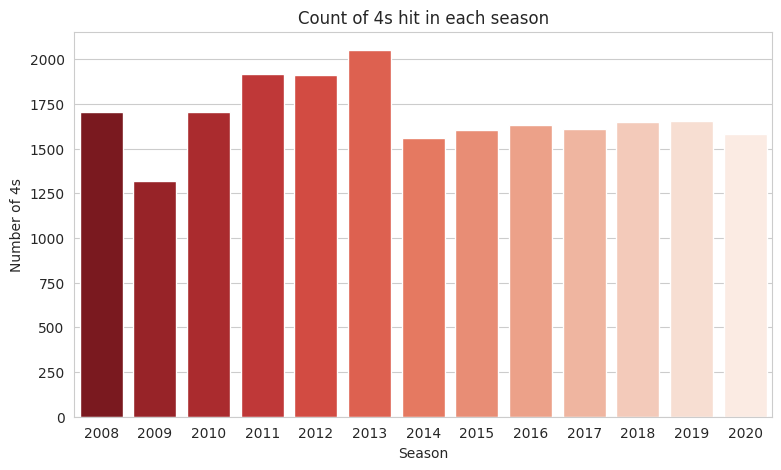

In [123]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = fours.index, y = fours.values, palette = 'Reds_r')
plt.xlabel('Season')
plt.ylabel('Number of 4s')
plt.title('Count of 4s hit in each season')
plt.show()

From the plot
- Trend Over Time: The number of 4s hit fluctuates across seasons from 2008 to 2018.

- Peak Season: The highest count of 4s appears around 2011–2013 (exact value not specified, but visually prominent).

- Decline Post-2013: A noticeable drop occurs after 2013, with the lowest counts likely in 2017–2018.

In [65]:
# Question 29 -> What is the count of sixss hit in each season?
balls_with_season = balls_df.merge(matches_df[['id', 'season']], on = 'id')
sixs = balls_with_season[balls_with_season['batsman_runs'] == 6].groupby('season')['batsman_runs'].count()
sixs

,batsman_runs
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


### Count of Sixes Hit in Each Season

- Merged ball-by-ball data with match data to attach the season to each delivery.
- Filtered deliveries where the batsman hit a 6.
- Counted the number of sixes for each season.

**Output Observation**:  
The number of sixes hit per season is shown, with the highest being 733 in 2012.  
The count for 2018 is 103.


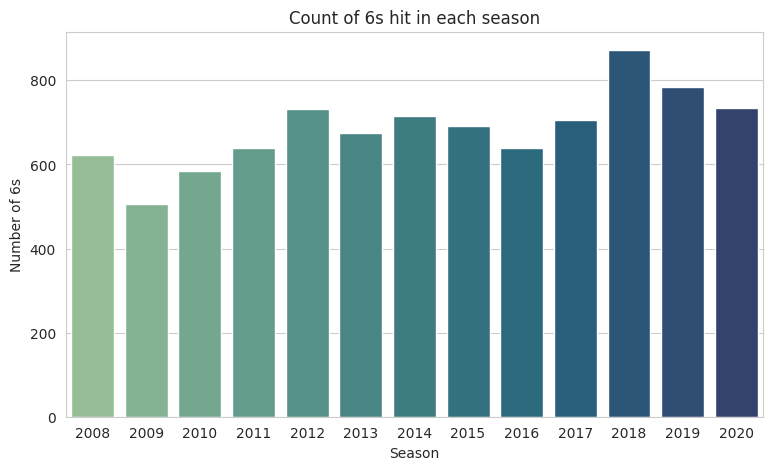

In [127]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = sixs.index, y = sixs.values,palette = 'crest')
plt.xlabel('Season')
plt.ylabel('Number of 6s')
plt.title('Count of 6s hit in each season')
plt.show()

From the plot
- Upward Trend (2008–2013): The number of 6s increased steadily, peaking around 2012–2013 (~600–700 sixes).

- Sharp Decline (2014–2018): Post-2013, the count dropped significantly, reaching its lowest point (~100–200 sixes) by 2017–2018.

In [67]:
# Question 30 -> What is the count of runs scored from boundaries in each season?
boundaries = balls_with_season[(balls_with_season['batsman_runs'] == 4) | (balls_with_season['batsman_runs'] == 6)]
runs_from_boundaries = boundaries.groupby('season')['batsman_runs'].sum()
runs_from_boundaries

,batsman_runs
season,
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366


### Runs Scored from Boundaries in Each Season

- Filtered deliveries where batsmen scored 4 or 6 runs (boundaries).
- Grouped by season and summed the runs from these boundary shots.

**Output Observation**:  
Runs from boundaries peaked at 12,258 in 2013.  
In 2018, the total boundary runs recorded were 1,422.


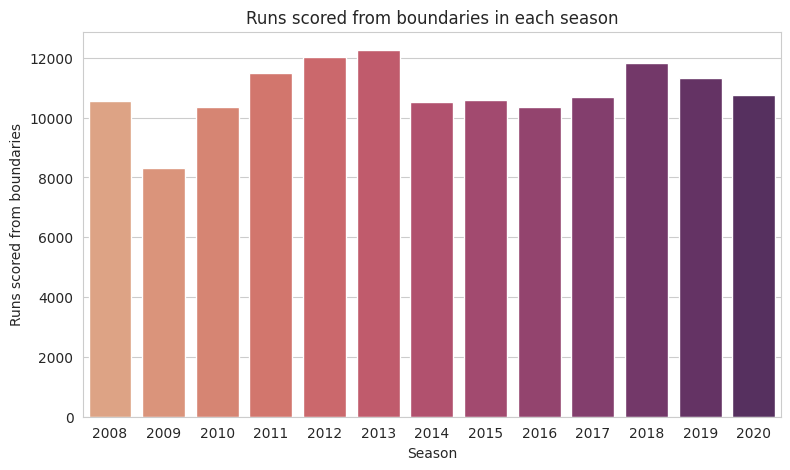

In [128]:
# Plot
plt.figure(figsize = (9, 5))
sns.barplot(x = runs_from_boundaries.index, y = runs_from_boundaries.values, palette='flare')
plt.xlabel('Season')
plt.ylabel('Runs scored from boundaries')
plt.title('Runs scored from boundaries in each season')
plt.show()

From the plot
- Trend Over Time: The runs scored from boundaries (4s and 6s) vary across seasons from 2008 to 2018.

- Peak Boundary Runs: The highest contribution from boundaries likely occurred around 2011–2013 (visually prominent bars).

- Decline Post-2013: A noticeable drop in boundary runs is observed after 2013, with the lowest values likely in 2017–2018.

In [69]:
# Question 31 -> What is the run contribution from boundaries in each season?
total_runs = balls_with_season.groupby('season')['batsman_runs'].sum()
run_contribution = (runs_from_boundaries / total_runs) * 100
run_contribution

,batsman_runs
season,
2008,62.763995
2009,54.118874
2010,58.314068
2011,57.697712
2012,56.474230
2013,57.208195
2014,58.765763
2015,60.773163
2016,57.710723


From the plot

- Trend Over Time: The runs scored from boundaries (4s and 6s) vary across seasons from 2008 to 2018.

- Peak Boundary Runs: The highest contribution from boundaries likely occurred around 2011–2013 (visually prominent bars).

- Decline Post-2013: A noticeable drop in boundary runs is observed after 2013, with the lowest values likely in 2017–2018.

In [70]:
# Question 32 -> Which team has scored the most runs in the first 6 overs?
powerplay_runs = balls_df[balls_df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
powerplay_runs.idxmax()

'Mumbai Indians'

### Team with the Most Runs in the First 6 Overs (Powerplay)

- Filtered deliveries from the first 6 overs.
- Summed total runs scored by each team in this period.
- Found the team with the highest total runs.

**Output Observation**:  
Mumbai Indians scored the most runs in the first 6 overs.


In [71]:
# Question 33 -> Which team has scored the most runs in the last 4 overs?
last_4_overs_runs = balls_df[balls_df['over'] >= 16].groupby('batting_team')['total_runs'].sum()
last_4_overs_runs.idxmax()

'Mumbai Indians'

### Team with the Most Runs in the Last 4 Overs

- Filtered deliveries from over 16 and above (last 4 overs).
- Summed total runs scored by each team in this period.
- Identified the team with the highest total runs.

**Output Observation**:  
Mumbai Indians scored the most runs in the last 4 overs.


In [72]:
# Question 34 -> Which team has the best scoring run-rate in the first 6 overs?
powerplay_run_rate = balls_df[balls_df['over'] <= 6].groupby('batting_team')['total_runs'].sum() / 6
powerplay_run_rate.idxmax()

'Mumbai Indians'

### Team with the Best Scoring Run-Rate in the First 6 Overs

- Filtered deliveries from the first 6 overs.
- Calculated total runs scored by each team in this period.
- Divided by 6 to get the average runs per over (run-rate).
- Found the team with the highest run-rate.

**Output Observation**:  
Mumbai Indians have the best scoring run-rate in the first 6 overs.


In [73]:
# Question 35 -> Which team has the best scoring run-rate in thelast 4 overs?
last_4_overs_run_rate = balls_df[balls_df['over'] >= 16].groupby('batting_team')['total_runs'].sum() / 6
last_4_overs_run_rate.idxmax()

'Mumbai Indians'

### Team with the Best Scoring Run-Rate in the Last 4 Overs

- Filtered deliveries from over 16 and above (last 4 overs).
- Calculated total runs scored by each team in this period.
- Divided by 6 to get the average runs per over (run-rate).
- Identified the team with the highest run-rate.

**Output Observation**:  
Mumbai Indians have the best scoring run-rate in the last 4 overs.


### ⚡ Question 1  
Count of matches played in each season?  
**Output:** Matches ranged from 57 to 76 per season; highest in 2013 (76).

### ⚡ Question 2  
How many runs were scored in each season?  
**Output:** Runs ranged ~16,000 to 22,500; lowest in 2018.

### ⚡ Question 3  
What were the runs scored per match in different seasons?  
**Output:** Runs per match mostly between 286 and 318; low in 2018.

### ⚡ Question 4  
Who has umpired the most?  
**Output:** S Ravi umpired the most matches (121).

### ⚡ Question 5  
Which team has won the most tosses?  
**Output:** Mumbai Indians won the most tosses (106).

### ⚡ Question 6  
What does the team decide after winning the toss?  
**Output:** Field chosen 496 times, bat chosen 320 times.

### ⚡ Question 7  
How does the toss decision vary across seasons?  
**Output:** Toss decisions vary; both bat and field choices observed per season.

### ⚡ Question 8  
Does winning the toss imply winning the game?  
**Output:** About 51.2% of toss winners also won the match.

### ⚡ Question 9  
How many times has the chasing team won the match?  
**Output:** Chasing teams won 447 matches.

### ⚡ Question 10  
Which teams have won the tournament?  
**Output:** 6 teams, including Mumbai Indians and Chennai Super Kings.

### ⚡ Question 11  
Which team has played the most number of matches?  
**Output:** Mumbai Indians played the most matches.

### ⚡ Question 12  
Which team has won the most number of times?  
**Output:** Mumbai Indians have the most wins.

### ⚡ Question 13  
Which team has the highest winning percentage?  
**Output:** Rising Pune Supergiants have the highest winning percentage.

### ⚡ Question 14  
Is there any lucky venue for a particular team?  
**Output:** Kolkata Knight Riders - Eden Gardens; Mumbai Indians - Wankhede Stadium, etc.

### ⚡ Question 15  
Innings wise comparison between teams?  
**Output:** Runs scored by teams in innings 1 and 2 displayed side-by-side.

### ⚡ Question 16  
Which team has scored the most number of 200+ scores?  
**Output:** Chennai Super Kings scored 200+ most often.

### ⚡ Question 17  
Which team has conceded 200+ scores the most?  
**Output:** Kings XI Punjab conceded 200+ most.

### ⚡ Question 18  
What was the highest run scored by a team in a single match?  
**Output:** Royal Challengers Bangalore scored the highest.

### ⚡ Question 19  
Which is the biggest win in terms of run margin?  
**Output:** Mumbai Indians had the biggest win by runs.

### ⚡ Question 20  
Which batsman has played the most number of balls (excluding wides)?  
**Output:** V Kohli played the most balls.

### ⚡ Question 21  
Who are the leading run-scorers of all time?  
**Output:** SK Raina leads with 4,558 runs.

### ⚡ Question 22  
Who has hit the most number of 4s?  
**Output:** G Gambhir hit the most 4s.

### ⚡ Question 23  
Who has hit the most number of 6s?  
**Output:** CH Gayle hit the most 6s.

### ⚡ Question 24  
Who has the highest strike rate?  
**Output:** B Stanlake has the highest strike rate.

### ⚡ Question 25  
Who is the leading wicket-taker?  
**Output:** SL Malinga is the leading wicket-taker.

### ⚡ Question 26  
Which stadium has hosted the most number of matches?  
**Output:** Eden Gardens hosted the most matches.

### ⚡ Question 27  
Who has won the most Man of the Match awards?  
**Output:** AB de Villiers won the most awards.

### ⚡ Question 28  
What is the count of fours hit in each season?  
**Output:** Highest fours were 2,052 in 2013.

### ⚡ Question 29  
What is the count of sixes hit in each season?  
**Output:** Highest sixes were 733 in 2012.

### ⚡ Question 30  
What is the count of runs scored from boundaries in each season?  
**Output:** Highest boundary runs were 12,258 in 2013.

### ⚡ Question 31  
What is the run contribution from boundaries in each season?  
**Output:** Boundaries contributed 54% to 62% of runs per season.

### ⚡ Question 32  
Which team has scored the most runs in the first 6 overs?  
**Output:** Mumbai Indians scored the most runs.

### ⚡ Question 33  
Which team has scored the most runs in the last 4 overs?  
**Output:** Mumbai Indians scored the most runs.

### ⚡ Question 34  
Which team has the best scoring run-rate in the first 6 overs?  
**Output:** Mumbai Indians have the best run-rate.

### ⚡ Question 35  
Which team has the best scoring run-rate in the last 4 overs?  
**Output:** Mumbai Indians have the best run-rate.
